# Classify handwritten digits using the famous MNIST data

> The goal in this competition is to take an image of a handwritten single digit, and determine what that digit is.  As the competition progresses, we will release tutorials which explain different machine learning algorithms and help you to get started.

> The data for this competition were taken from the MNIST dataset. The MNIST ("Modified National Institute of Standards and Technology") dataset is a classic within the Machine Learning community that has been extensively studied.  More detail about the dataset, including Machine Learning algorithms that have been tried on it and their levels of success, can be found at http://yann.lecun.com/exdb/mnist/index.html.

** Dependencies **

In [2]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Reading the Data

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

In [15]:
digits = pd.read_csv("data/train.csv")
X_test = pd.read_csv("data/test.csv").values

# Extract the features and labels
X, y = digits.iloc[:,1:].values, digits[[0]].values.ravel()

X.shape, y.shape, X_test.shape

((42000, 784), (42000,), (28000, 784))

** Benchmark **

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split

# Generate a 75:25 hold-out dataset
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Fit the model model
clf = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)

# Predict labels for our hold-out dataset
y_pred = clf.predict(X_test)

# Score our new model
clf.score(X_test, y_test)

0.96171428571428574

** Reshaping **

Lets reshape our data from list form to a numpy array of size 28x28, i.e. each row will contain a 28 by 28 matrix of pixel color values

In [20]:
X = np.array(X).reshape((-1, 1, 28, 28))
X_test = np.array(X_test).reshape((-1, 1, 28, 28))

## Visualizing the Digits

Let's take a look at some digits 

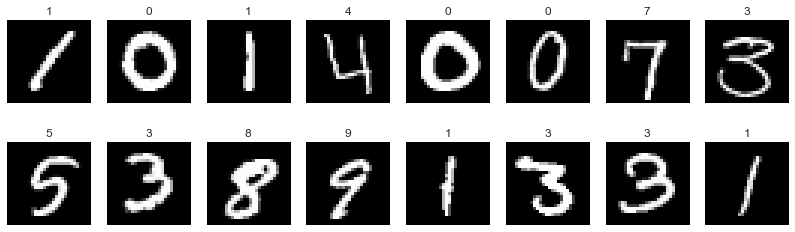

In [32]:
plt.figure(figsize=(14,4))

nrows, ncols = 2, 8

for i in range(ncols * nrows):
    ax = plt.subplot(nrows, ncols, i + 1)
    plt.imshow(X[i][0], interpolation='nearest', cmap=plt.cm.gray)
    # Remove plot ticks
    plt.xticks([]); plt.yticks([])
    plt.title(y[i])